In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
appointment = pd.read_csv("/kaggle/input/hospital-management-dataset/appointments.csv")
billing = pd.read_csv("/kaggle/input/hospital-management-dataset/billing.csv")
doctor = pd.read_csv("/kaggle/input/hospital-management-dataset/doctors.csv")
patient = pd.read_csv("/kaggle/input/hospital-management-dataset/patients.csv")
treatment = pd.read_csv("/kaggle/input/hospital-management-dataset/treatments.csv")

In [3]:
print(appointment.head())
print(billing.head())
print(doctor.head())
print(patient.head())
print(treatment.head())

  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  
  bill_id patient_id treatment_id   bill_date   amount payment_method  \
0    B001       P034         T001  2023-08-09  3941.97      Insurance   
1    B002       P032         T002  2023-06-09  4158.44      Insurance   
2    B003       P048         T003  2023-06-28  3731.55      Insurance   
3    B004       P025         T004  2023-09-01  4799.86      Insur

In [4]:
print(appointment.info())
print(billing.info())
print(doctor.info())
print(patient.info())
print(treatment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_id         200 non-null    object 
 1   patient_id      200 non-null    object 
 2   treatment_id    200 non-null    object 
 3   bill_date       200 non-null    object 
 4   amount          200 non-null    float64
 5   payment_meth

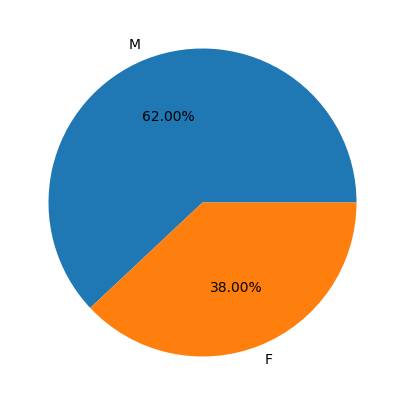

In [5]:
plt.figure(figsize =(5,5))
plt.pie(patient['gender'].value_counts().values,labels=patient['gender'].value_counts().index,autopct='%1.2f%%')
plt.show()

**Maximum people are Male for visiting the hospital.**

([<matplotlib.patches.Wedge at 0x7e3206b08250>,
 [Text(0.46835717599151966, 0.995309778760989, 'MedCare Plus'),
  Text(-1.0913261621521642, -0.1378666304884122, 'WellnessCorp'),
  Text(0.20611950472011625, -1.0805159646085447, 'PulseSecure'),
  Text(1.0227541568457088, -0.40493695145642544, 'HealthIndia')],
 [Text(0.25546755054082887, 0.5428962429605394, '36.00%'),
  Text(-0.5952688157193622, -0.07519998026640663, '32.00%'),
  Text(0.11242882075642703, -0.5893723443319334, '20.00%'),
  Text(0.5578659037340229, -0.22087470079441385, '12.00%')])

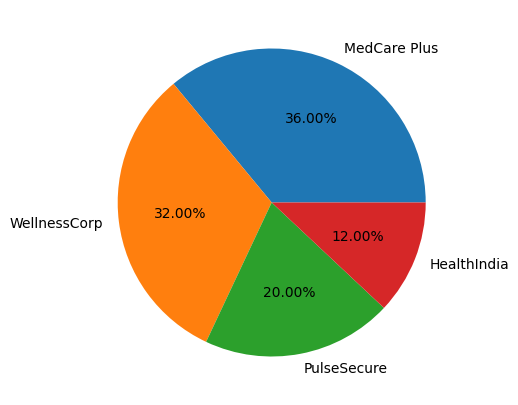

In [6]:
plt.figure(figsize=(5,5))
plt.pie(patient['insurance_provider'].value_counts().values,labels=patient['insurance_provider'].value_counts().index,autopct='%1.2f%%')

**People mainly use those company such as MedCare Plus and WellnessCorp for their insurance provider**

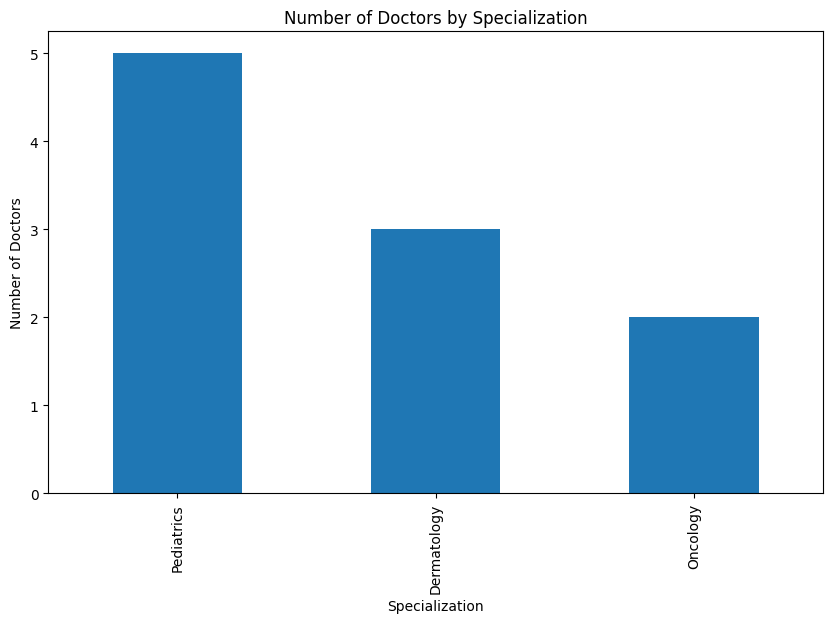

In [7]:
# Count the number of doctors per specialization
specialization_counts = doctor['specialization'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
specialization_counts.plot(kind='bar')
plt.title('Number of Doctors by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Number of Doctors')
plt.show()

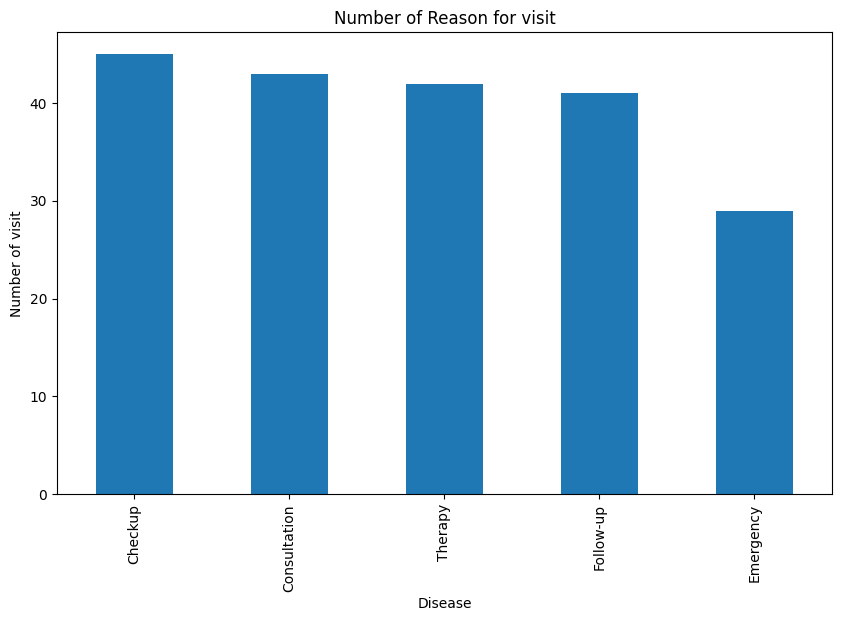

In [8]:
reason_for_visit_counts = appointment['reason_for_visit'].value_counts()
# Plotting
plt.figure(figsize=(10, 6))
reason_for_visit_counts.plot(kind='bar')
plt.title('Number of Reason for visit')
plt.xlabel('Disease')
plt.ylabel('Number of visit')
plt.show()

([<matplotlib.patches.Wedge at 0x7e3206603210>,
 [Text(0.42095177560159885, 1.0162674857624154, 'Credit Card'),
  Text(-1.0735084435245696, -0.23995754141400913, 'Insurance'),
  Text(0.6325057570250199, -0.8999647033801974, 'Cash')],
 [Text(0.22961005941905388, 0.5543277195067721, '37.50%'),
  Text(-0.5855500601043107, -0.1308859316803686, '32.00%'),
  Text(0.34500314019546535, -0.49088983820738036, '30.50%')])

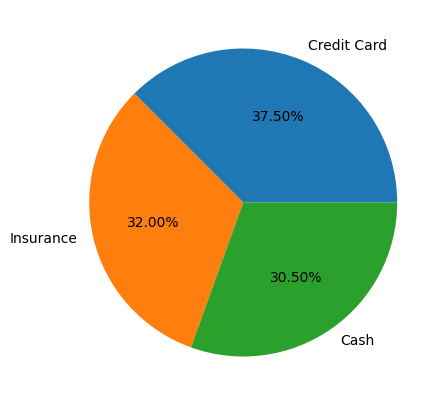

In [9]:
plt.figure(figsize=(5,5))
plt.pie(billing['payment_method'].value_counts().values,labels=billing['payment_method'].value_counts().index,autopct='%1.2f%%')

**Most people use credit cards to pay their bills.**

# Analysis of Revenue per Doctor

In [10]:
treatments_billing = pd.merge(treatment, billing, on='treatment_id')
merged_data = pd.merge(treatments_billing, appointment, on='appointment_id')
#only successful payment
paid_data = merged_data[merged_data['payment_status'] == 'Paid']
# Group by doctor_id and sum the amount to calculate revenue per doctor
revenue_per_doctor = paid_data.groupby('doctor_id')['amount'].sum().reset_index()

revenue_with_names = pd.merge(revenue_per_doctor, doctor[['doctor_id', 'first_name', 'last_name']], on='doctor_id')
revenue_with_names['doctor_name'] = revenue_with_names['first_name'] + ' ' + revenue_with_names['last_name']
revenue_final = revenue_with_names[['doctor_name', 'amount']].sort_values(by='amount', ascending=False)
revenue_final

,doctor_name,amount
4,Sarah Taylor,33836.91
5,Alex Davis,25698.80
9,Linda Wilson,18935.50
0,David Taylor,18572.75
1,Jane Davis,18201.70
3,David Jones,17693.42
2,Jane Smith,17260.25
7,Linda Brown,12919.88
8,Sarah Smith,9230.98
6,Robert Davis,1074.71


# ***Thank You for visiting my notebook. Feel free to comment and upvote it.***